In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Gulim'

# 데이터 분석

## 그래프 x축 가져오기

In [12]:
df = pd.read_excel('./data_anal_proj/주간 아파트 매매가격지수_20241026.xlsx').T

In [20]:
seoul_columns = list ( df.values[0][:29] ) #추출할 서울 구 확인

In [21]:
df_seoul = df.drop(df.columns[29:], axis=1) # 서울 외 지역 칼럼에서 제외

In [22]:
df_seoul.columns = seoul_columns #칼럼 다시 세팅
df_seoul = df_seoul.iloc[1:]

In [23]:
df_seoul = df_seoul.drop( df_seoul.index[60] ) #예외 행 지우기

In [24]:
# df_seoul.index 를 통해 x축 가져오기

## 그래프 겹쳐그리기

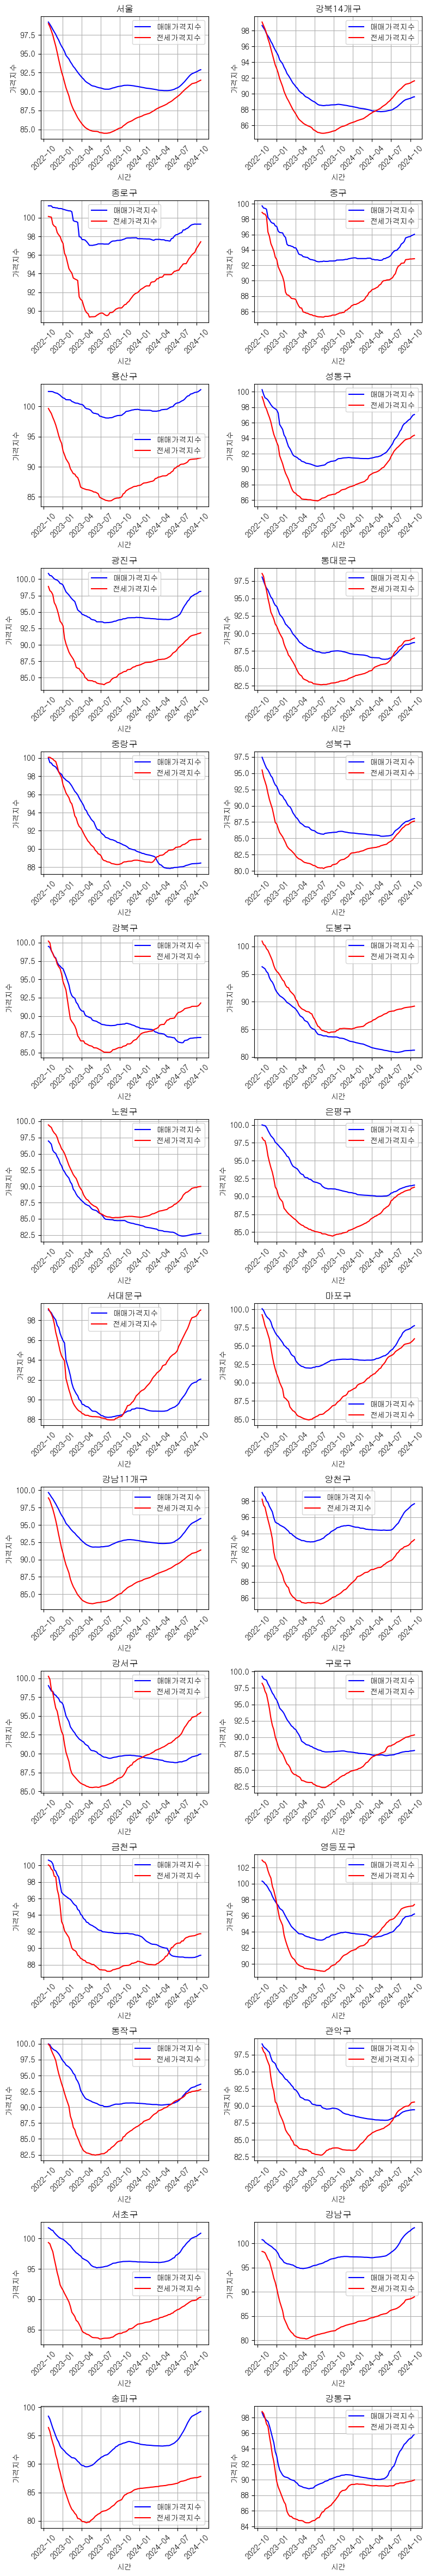

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터 불러오기 (각각 매매가격지수와 전세가격지수 파일이라고 가정)
df_maemae = pd.read_csv('data_maemae.csv', index_col=0, parse_dates=True)
df_jeonse = pd.read_csv('data_jeonse.csv', index_col=0, parse_dates=True)

# 구 이름 리스트 (두 파일의 컬럼이 동일하다고 가정)
seoul_columns = df_maemae.columns

# 하나의 Figure 생성 및 설정
fig = plt.figure(figsize=(8, 50))
i = 1

# 각 구별로 Subplot을 생성하여 매매와 전세 데이터를 겹쳐 그리기
num_plots = len(seoul_columns)
rows = (num_plots // 2) + 1  # 2열로 나눌 경우 필요한 행 수 계산

for gu in seoul_columns:
    plt.subplot(rows, 2, i)
    
    # 매매가격지수 그래프
    plt.plot(df_seoul.index, df_maemae[gu], label='매매가격지수', color='b') # 위에서 가져온 df_seoul 활용
    
    # 전세가격지수 그래프
    plt.plot(df_seoul.index, df_jeonse[gu], label='전세가격지수', color='r')
    
    plt.title(gu)
    plt.xlabel('시간')  # x축 레이블을 시간으로 지정
    plt.ylabel('가격지수')  # y축 레이블을 가격지수로 지정
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid()  # 그리드 추가
    plt.legend()  # 범례 추가
    
    i += 1

# 레이아웃 조정 후 출력
plt.tight_layout()
plt.show()


# 결과 해석

In [ ]:
전국 지수에 비해 서울 지수가 최근 많이 오른 편.
서울 집값이 급등했던 21년도를 기준으로
22년 부터 급락기가 시작되며 23년 상반기 바닥을 찍고 조금씩 오르고 있는 추세.
일반적으로 매매지수가 오르면 전세지수가 따라 오른다.

매매지수 - 미래 가치 반영
전세지수 - 현재 가치 반영
매매지수가 전세지수보다 높은 지역 : 실거주 수요보다 투자 수요가 많은 지역. 미래 가치가 높은 지역
전세지수가 매매지수보다 높은 지역 : 투자 수요보다 실거주 수요가 많은 지역. 현재 가치가 높은 지역

투자 시 : 시드가 적다면 매매지수에 비해 전세지수가 높은 곳을 찾되 집값 자체가 안올라 차익을 낼 수 없는 지역은 피한다. 시드가 많다면 미래가치를 우선적으로 본다.
실거주 시 : 등락을 보여주는 지표인 지수 그래프보다 절대적 지표인 전세가격을 보고 결정하는게 좋아보인다.

매매지수-전세지수 차이 적은 곳
동대문 중랑 성북 강북 도봉 노원 은평 서대문(전세 가장 많이 오름)
마포 강서 구로 금천 영등포 동작 관악

애매
종로 중구 성동 양천

매매-전세 차이 큰 곳
서초 강남 송파 강동 용산 광진